In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import pylab
import copy
%matplotlib inline


In [2]:
data_q4 = pd.read_excel("/Users/sheikita/Desktop/data/H-1B_copy.xlsx")

In [3]:
data_q4

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS,...,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,PUBLIC_DISCLOSURE_LOCATION,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,I-200-18026-338377,CERTIFIED,2018-01-29,2018-02-02,H-1B,2018-07-28,2021-07-27,MICROSOFT CORPORATION,NaN,1 MICROSOFT WAY,...,N,N,NaN,NaN,NaN,REDMOND,KING,WA,98052,NaT
1,I-200-17296-353451,CERTIFIED,2017-10-23,2017-10-27,H-1B,2017-11-06,2020-11-06,ERNST & YOUNG U.S. LLP,NaN,200 PLAZA DRIVE,...,N,N,NaN,NaN,NaN,SANTA CLARA,SAN JOSE,CA,95110,NaT
2,I-200-18242-524477,CERTIFIED,2018-08-30,2018-09-06,H-1B,2018-09-10,2021-09-09,LOGIXHUB LLC,NaN,320 DECKER DRIVE,...,N,N,NaN,NaN,NaN,IRVING,DALLAS,TX,75062,NaT
3,I-200-18070-575236,CERTIFIED,NaT,2018-03-30,H-1B,2018-09-10,2021-09-09,"HEXAWARE TECHNOLOGIES, INC.",NaN,101 WOOD AVENUE SOUTH,...,Y,N,Y,NaN,NaN,NEW CASTLE,NEW CASTLE,DE,19720,NaT
4,I-200-18243-850522,CERTIFIED,2018-08-31,2018-09-07,H-1B,2018-09-07,2021-09-06,"ECLOUD LABS,INC.",NaN,120 S WOOD AVENUE,...,Y,N,Y,Y,NaN,BIRMINGHAM,SHELBY,AL,35244,NaT
5,I-200-18142-939501,CERTIFIED,2018-05-22,2018-05-29,H-1B,2018-05-29,2021-05-28,OBERON IT,NaN,1404 W WALNUT HILL LN,...,Y,N,Y,NaN,NaN,SUNRISE,BROWARD,FL,33323,NaT
6,I-200-18121-552858,CERTIFIED,2018-05-01,2018-05-07,H-1B,2018-05-02,2018-10-26,ICONSOFT INC.,NaN,101 CAMBRIDGE STREET SUITE 360,...,Y,N,Y,NaN,NaN,JACKSONVILLE,DUVAL COUNTY,FL,32202,NaT
7,I-200-18215-849606,CERTIFIED,2018-08-03,2018-08-09,H-1B,2018-08-11,2021-08-11,COGNIZANT TECHNOLOGY SOLUTIONS US CORP,NaN,211 QUALITY CIRCLE,...,Y,N,Y,NaN,NaN,OWINGS MILLS,BALTIMORE,MD,21117,NaT
8,I-201-17339-472823,CERTIFIED,2017-12-08,2017-12-14,H-1B1 Chile,2017-12-08,2019-06-07,ISHI SYSTEMS INC,NaN,185 HUDSON STREET,...,NaN,NaN,NaN,NaN,NaN,JERSEY CITY,HUDSON,NJ,07311,NaT
9,I-200-18233-239931,CERTIFIED,2018-08-21,2018-08-27,H-1B,2018-09-05,2021-09-04,"WB SOLUTIONS, LLC",NaN,7320 E FLETCHER AVE,...,Y,N,Y,Y,NaN,ALPHARETTA,FULTON,GA,30005,NaT


In [4]:
data_q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654360 entries, 0 to 654359
Data columns (total 52 columns):
CASE_NUMBER                    654360 non-null object
CASE_STATUS                    654360 non-null object
CASE_SUBMITTED                 654359 non-null datetime64[ns]
DECISION_DATE                  654360 non-null datetime64[ns]
VISA_CLASS                     654360 non-null object
EMPLOYMENT_START_DATE          654353 non-null datetime64[ns]
EMPLOYMENT_END_DATE            654349 non-null datetime64[ns]
EMPLOYER_NAME                  654341 non-null object
EMPLOYER_BUSINESS_DBA          53490 non-null object
EMPLOYER_ADDRESS               654349 non-null object
EMPLOYER_CITY                  654349 non-null object
EMPLOYER_STATE                 654287 non-null object
EMPLOYER_POSTAL_CODE           654342 non-null object
EMPLOYER_COUNTRY               654353 non-null object
EMPLOYER_PROVINCE              6705 non-null object
EMPLOYER_PHONE                 654353 non-null obj

In [5]:
data_q4.loc[:, data_q4.isnull().any()]

,CASE_SUBMITTED,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,...,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,PUBLIC_DISCLOSURE_LOCATION,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,2018-01-29,2018-07-28,2021-07-27,MICROSOFT CORPORATION,NaN,1 MICROSOFT WAY,REDMOND,WA,98052,UNITED STATES OF AMERICA,...,N,N,NaN,NaN,NaN,REDMOND,KING,WA,98052,NaT
1,2017-10-23,2017-11-06,2020-11-06,ERNST & YOUNG U.S. LLP,NaN,200 PLAZA DRIVE,SECAUCUS,NJ,07094,UNITED STATES OF AMERICA,...,N,N,NaN,NaN,NaN,SANTA CLARA,SAN JOSE,CA,95110,NaT
2,2018-08-30,2018-09-10,2021-09-09,LOGIXHUB LLC,NaN,320 DECKER DRIVE,IRVING,TX,75062,UNITED STATES OF AMERICA,...,N,N,NaN,NaN,NaN,IRVING,DALLAS,TX,75062,NaT
3,NaT,2018-09-10,2021-09-09,"HEXAWARE TECHNOLOGIES, INC.",NaN,101 WOOD AVENUE SOUTH,ISELIN,NJ,08830,UNITED STATES OF AMERICA,...,Y,N,Y,NaN,NaN,NEW CASTLE,NEW CASTLE,DE,19720,NaT
4,2018-08-31,2018-09-07,2021-09-06,"ECLOUD LABS,INC.",NaN,120 S WOOD AVENUE,ISELIN,NJ,08830,UNITED STATES OF AMERICA,...,Y,N,Y,Y,NaN,BIRMINGHAM,SHELBY,AL,35244,NaT
5,2018-05-22,2018-05-29,2021-05-28,OBERON IT,NaN,1404 W WALNUT HILL LN,IRVING,TX,75038,UNITED STATES OF AMERICA,...,Y,N,Y,NaN,NaN,SUNRISE,BROWARD,FL,33323,NaT
6,2018-05-01,2018-05-02,2018-10-26,ICONSOFT INC.,NaN,101 CAMBRIDGE STREET SUITE 360,BURLINGTON,MA,01803,UNITED STATES OF AMERICA,...,Y,N,Y,NaN,NaN,JACKSONVILLE,DUVAL COUNTY,FL,32202,NaT
7,2018-08-03,2018-08-11,2021-08-11,COGNIZANT TECHNOLOGY SOLUTIONS US CORP,NaN,211 QUALITY CIRCLE,COLLEGE STATION,TX,77845,UNITED STATES OF AMERICA,...,Y,N,Y,NaN,NaN,OWINGS MILLS,BALTIMORE,MD,21117,NaT
8,2017-12-08,2017-12-08,2019-06-07,ISHI SYSTEMS INC,NaN,185 HUDSON STREET,JERSEY CITY,NJ,07311,UNITED STATES OF AMERICA,...,NaN,NaN,NaN,NaN,NaN,JERSEY CITY,HUDSON,NJ,07311,NaT
9,2018-08-21,2018-09-05,2021-09-04,"WB SOLUTIONS, LLC",NaN,7320 E FLETCHER AVE,TAMPA,FL,33637,UNITED STATES OF AMERICA,...,Y,N,Y,Y,NaN,ALPHARETTA,FULTON,GA,30005,NaT


### Is there a particular trend on the processing times for H1B?

In [6]:
data_q4['DURATION'] = data_q4['DECISION_DATE'] - data_q4['CASE_SUBMITTED']

In [7]:
df_h = data_q4[['DURATION','CASE_STATUS','EMPLOYER_NAME']]
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654360 entries, 0 to 654359
Data columns (total 3 columns):
DURATION         654359 non-null timedelta64[ns]
CASE_STATUS      654360 non-null object
EMPLOYER_NAME    654341 non-null object
dtypes: object(2), timedelta64[ns](1)
memory usage: 15.0+ MB


In [8]:
df_h['CASE_STATUS'] = df_h['CASE_STATUS'].astype('category')
df_h['EMPLOYER_NAME'] = df_h['EMPLOYER_NAME'].astype('category')
df_h.info()


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654360 entries, 0 to 654359
Data columns (total 3 columns):
DURATION         654359 non-null timedelta64[ns]
CASE_STATUS      654360 non-null category
EMPLOYER_NAME    654341 non-null category
dtypes: category(2), timedelta64[ns](1)
memory usage: 11.2 MB


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
df_h["Case_cat"] = df_h["CASE_STATUS"].cat.codes
df_h.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,DURATION,CASE_STATUS,EMPLOYER_NAME,Case_cat
0,4 days,CERTIFIED,MICROSOFT CORPORATION,0
1,4 days,CERTIFIED,ERNST & YOUNG U.S. LLP,0
2,7 days,CERTIFIED,LOGIXHUB LLC,0
3,NaT,CERTIFIED,"HEXAWARE TECHNOLOGIES, INC.",0
4,7 days,CERTIFIED,"ECLOUD LABS,INC.",0


In [11]:
x = df_h[['CASE_STATUS','Case_cat']]
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654360 entries, 0 to 654359
Data columns (total 2 columns):
CASE_STATUS    654360 non-null category
Case_cat       654360 non-null int8
dtypes: category(1), int8(1)
memory usage: 1.2 MB


In [12]:
x['Duration'] = df_h.DURATION/ np.timedelta64(1, 'h')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
x.head(30)

,CASE_STATUS,Case_cat,Duration
0,CERTIFIED,0,96.0
1,CERTIFIED,0,96.0
2,CERTIFIED,0,168.0
3,CERTIFIED,0,NaN
4,CERTIFIED,0,168.0
5,CERTIFIED,0,168.0
6,CERTIFIED,0,144.0
7,CERTIFIED,0,144.0
8,CERTIFIED,0,144.0
9,CERTIFIED,0,144.0


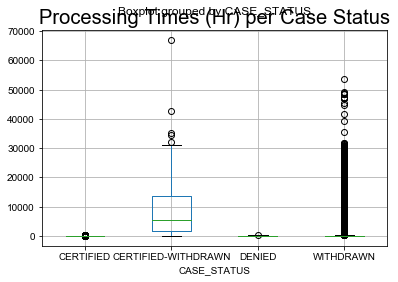

In [14]:
boxplot = x.boxplot(column='Duration', by='CASE_STATUS')
sns.set(rc={"figure.figsize": (12, 8)})
plt.style.use('fivethirtyeight')

margins = 0.02
plt.title('Processing Times (Hr) per Case Status')
plt.show()

An interesting finding is that for applications that ended up being Withdrawn, thera many processing times along the whisker that are outside of the highest observaton. The second one finding, is that highest observation of the set belongs to applications that ended up being Certified-Withdrawm. 

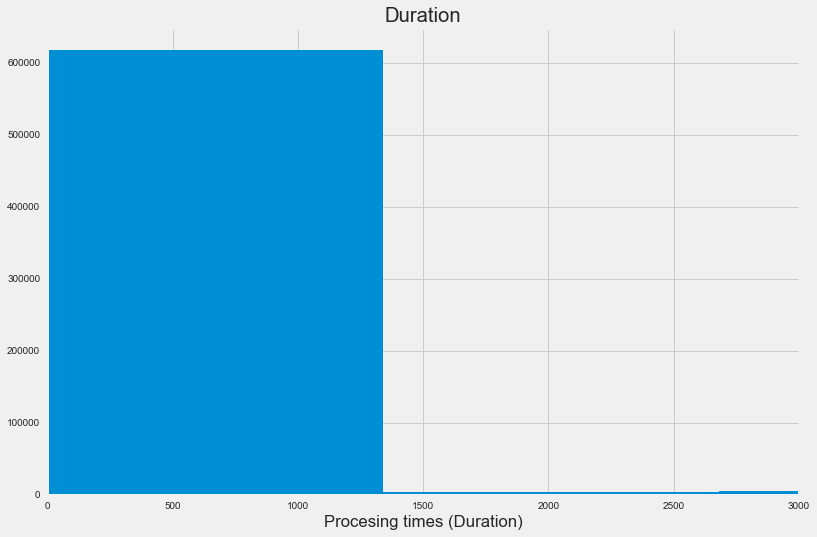

In [20]:
x.hist(column='Duration', bins=50)
plt.xlim(0, 3000)
plt.xlabel("Procesing times (Duration)")
sns.set(rc={"figure.figsize": (12, 8)})
plt.style.use('fivethirtyeight')
plt.show()

From the histogram, it can observerd that the majority of processing times are cluster to the left side of the plot (range from 0 = 1300 hours roughly)